## Forecast Model Limitations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Make csv into a pandas dataframe
inventory_forecast = pd.read_csv('inventory_forecasts.csv')
orders = pd.read_csv('orders.csv')
data_dictionary = pd.read_csv('data_dictionary.csv')
company_profiles = pd.read_csv('company_profiles.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [97]:
# Basic insights in orders.csv
print(orders['company_name'].unique())
print(company_profiles['company_name'].unique())
# Maybe these companies could be merged into one to read easier

# These are all the companies in the whole dataset
display((orders.merge(company_profiles, on='company_name', how='outer'))['company_name'].unique())


['AutoSeal Gaskets' 'Great Lakes Fasteners' 'PolyTech Midwest'
 'Delta Plastics' 'Midland Moldings' 'Precision Plastics West'
 'TriCounty Components' 'Riverbend Metals']
['Delta Plastics' 'Midland Moldings' 'Great Lakes Fasteners'
 'TriCounty Components' 'Riverbend Metals' 'Lakeside Warehousing'
 'Mid-MI Crossdock' 'Downtown Storage Co.' 'QuickRoute Carriers'
 'Superior Haulage' 'Mitten Last-Mile' 'AutoSeal Gaskets'
 'PolyTech Midwest' 'Precision Plastics West' 'North Fork Logistics']


array(['AutoSeal Gaskets', 'Delta Plastics', 'Downtown Storage Co.',
       'Great Lakes Fasteners', 'Lakeside Warehousing',
       'Mid-MI Crossdock', 'Midland Moldings', 'Mitten Last-Mile',
       'North Fork Logistics', 'PolyTech Midwest',
       'Precision Plastics West', 'QuickRoute Carriers',
       'Riverbend Metals', 'Superior Haulage', 'TriCounty Components'],
      dtype=object)

In [34]:
# Trying to find insights for actual quantity from region or sku

region_sku_actualqty = orders[['region', 'sku', 'actual_qty']]
# Attempting to aggregate region with actual_qty
region_actualqty = region_sku_actualqty.groupby('region').agg('sum')
print(region_actualqty)

                                                           sku  actual_qty
region                                                                    
Central MI   SKU0042SKU0013SKU0047SKU0008SKU0065SKU0012SKU0...       54988
Northern MI  SKU0051SKU0007SKU0028SKU0054SKU0009SKU0031SKU0...       23508
SE MI        SKU0020SKU0010SKU0005SKU0008SKU0029SKU0007SKU0...       37113
West MI      SKU0016SKU0008SKU0038SKU0019SKU0055SKU0047SKU0...       19346


### Heatmap for the correlation in orders.csv

<Axes: >

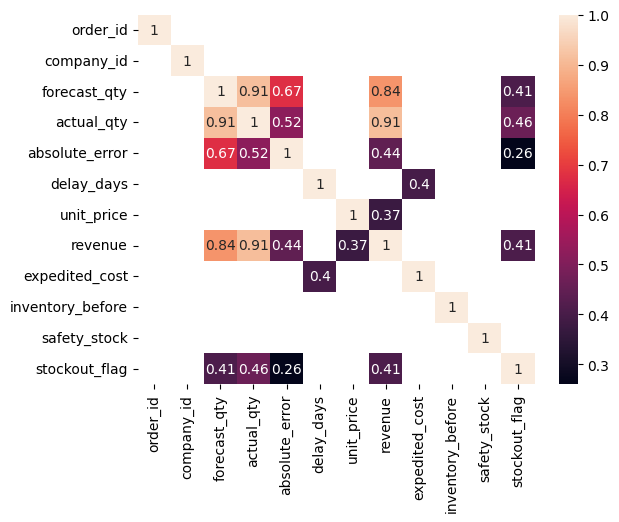

In [68]:
# Plotting which columns have the most correlation on a heatmap
orders_correlation = orders.corr(numeric_only=True)

# Only correlations higher than 0.2
sns.heatmap(orders_correlation[orders_correlation > 0.2], annot=True)

### Scatterplot between forecase and actual quantity

<Axes: xlabel='actual_qty', ylabel='forecast_qty'>

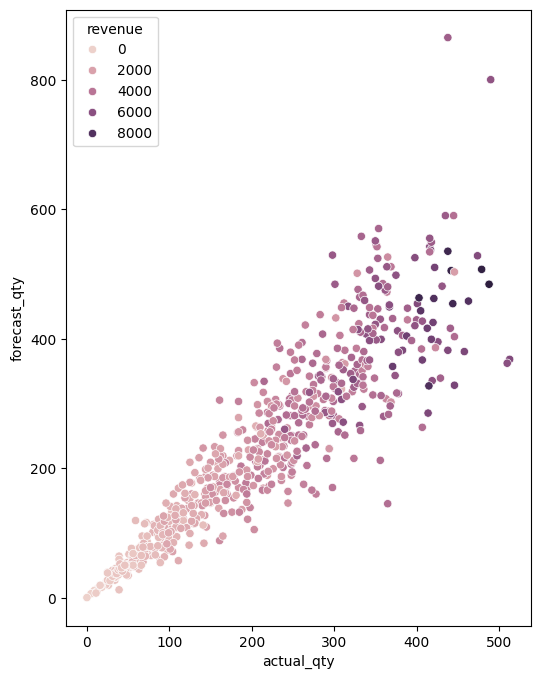

In [70]:
plt.figure(figsize=(6, 8))
sns.scatterplot(data=orders,
                y='forecast_qty',
                x='actual_qty',
                hue='revenue')

### Finding which companies perform worst

In [ ]:
orders["error"] = orders["actual_qty"] - orders["forecast_qty"]
orders["pct_error"] = (orders["error"] / orders["actual_qty"]) * 100

summary = orders.groupby("company_name")["pct_error"].mean().sort_values()
summary


company_name
Precision Plastics West   -13.038809
Great Lakes Fasteners     -11.916287
Riverbend Metals          -11.803127
AutoSeal Gaskets          -10.919272
PolyTech Midwest          -10.701027
Midland Moldings           -9.123757
TriCounty Components       -8.727007
Delta Plastics             -1.792562
Name: pct_error, dtype: float64